In [31]:
# Import all libraries
import matplotlib.image as image
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from skimage import color
import numpy as np

plt.rcParams["figure.figsize"] = [10.50, 7.50]
plt.rcParams["figure.autolayout"] = True

In [35]:
# Template code

a = np.random.rand(4, 3)
U, S, V = np.linalg.svd(a, full_matrices=True) # Full SVD decomposition
U.shape, S.shape, V.shape    # S is not a matrix and it only shows the non-zero diagonal elements!
a - np.dot(U[:,:3]*S, V)

array([[ 8.32667268e-17,  0.00000000e+00, -2.22044605e-16],
       [-2.22044605e-16,  5.55111512e-17,  5.55111512e-17],
       [-3.33066907e-16,  1.11022302e-16,  0.00000000e+00],
       [-1.24900090e-16, -2.22044605e-16,  8.32667268e-17]])

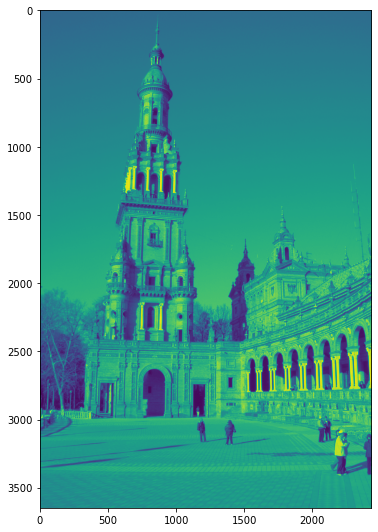

In [32]:
# Importing image
origImage = image.imread('/Users/fernandomontes/Pictures/Sevilla11/DSC01160.jpg', 'jpg')
angle = -90 # in degrees
origImage = ndimage.rotate(origImage, angle, reshape=True)
gwImage = color.rgb2gray(origImage) # image in black and white
#plt.imshow(origImage)   
plt.imshow(gwImage)
plt.show()

In [34]:
gwImage.shape

(3648, 2432)

In [37]:
# SVD of image

U, S, V = np.linalg.svd(gwImage, full_matrices=True) # Full SVD decomposition
U.shape, S.shape, V.shape    # S is not a matrix and it only shows the non-zero diagonal elements!

((3648, 3648), (2432,), (2432, 2432))

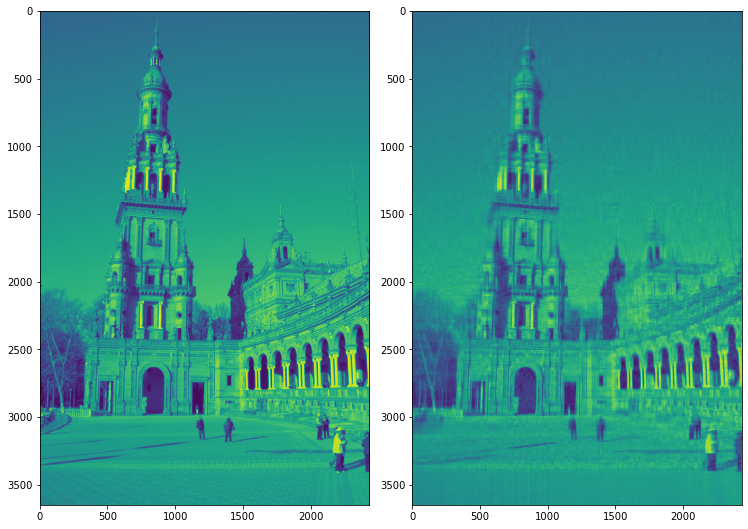

In [57]:
# Reduced image

r = 40
temp = U[:,:r]*S[:r]
redImage = np.dot(U[:,:r]*S[:r], V[:r,:])

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(gwImage)    
axes[1].imshow(redImage)    
plt.show()

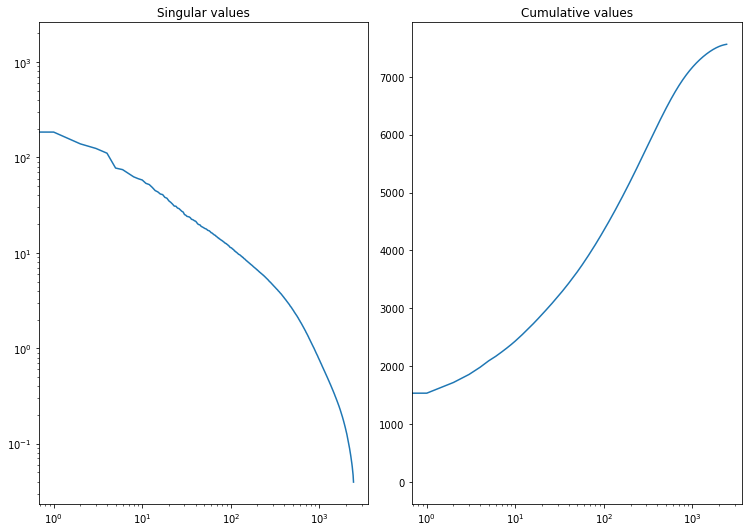

In [81]:
# Singular values and cumulative energy

sumS = [sum(S[:r]) for r in range(len(S))]

fig, ax = plt.subplots(1, 2)
ax[0].plot(S)
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].set_title("Singular values")

ax[1].plot(sumS)
ax[1].set_xscale("log")
ax[1].set_title("Cumulative values")
plt.show()